# 04. 밀도추정 & 교차검증
- 많은 통계적 개념은 평활화된 확률밀도에 의존
- 표본이 주어진다면, 그 것은 불연속적인 점의 집합만을 포함하는 것이며, 다른 점의 확률밀도에 대한 단서를 제공하지 않음

<br>

- 매개변수에 대한 모델은 일부 데이터에 대해 평활화된 확률 모델을 어기 위한 일반적인 접근 방식을 제공
    
    - 예) 표본 $X$에 대한 확률모델 $p(x)$에 대해, $X$가 정규분포를 따른다고 가정하면, $p(x)$의 평균과 분산이 $X$의 표본평균과 분산과 연관
    
    $\rightarrow$ 이 모델은 평활화된 확률밀도를 제공하지만, 데이터가 정규 분포를 따른다는 가정이 필요 
    
    $\rightarrow$ 이는 매우 제한적인 가정
    
<br>

- **커널 밀도 추정 : 밀도에 대한 특정 함수 형태를 가정하지 않고도, 표본에서 평활화된 확률 밀도를 얻을 수 있는 방법을 제공**

<br>

## 04-01. 커널 밀도 추정
- 커널 밀도 추정은 모든 관측값 주위에 커널 $Kh(x)$라는 적은 bump를 배치

    $\rightarrow$ 이러한 bump를 함께 평균화하면 원하는 확률 밀도를 얻을 수 있음

<br>

- 표본 $X = (x_1, x_2, \dots, x_n)$와 커널함수 $K(x)$는 아래의 조건을 만족

$$\int_{-\infty}^{\infty} K(x) \mathrm{d}x = 1,$$

- 커널 밀도 추정함수 $f_h(t)$는
    - $h$는 커널의 넓이를 의미 (커널의 대역폭)

$$f_h(t) = \frac{1}{nh} \sum_{i=1}^n K\left(\frac{t - x_i}{h}\right),$$

<br>

#### 커널의 일반적인 선택

- 표준 정규 분포의 밀도함수를 따르는 가우시안 커널 : $K_{\text{gauss}}(x) = \frac{1}{\sqrt(2 \pi)} \exp\left(\frac{-x^2}{2}\right),$
  


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def K_gauss(x):
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)

- 균등 커널 : $K_{\text{uniform}}(x) = \begin{cases}\frac{1}{2} \quad & \text{if } |x|<1, \\
0 & \text{otherwise},\end{cases}$

In [4]:
def K_uniform(x):
    return 0.5*(np.abs(x) < 1)

- 에파네치니코프 (Epanechnikov) 커널 : $K_{\text{Epanechnikov}}(x) = \begin{cases}\frac{3}{4}(1 - x^2) \quad & \text{if } |x|<1, \\
0 & \text{otherwise}.\end{cases}$

In [7]:
def K_epanechnikov(x):
    return 3/4*(1-x**2)*(np.abs(x) < 1)

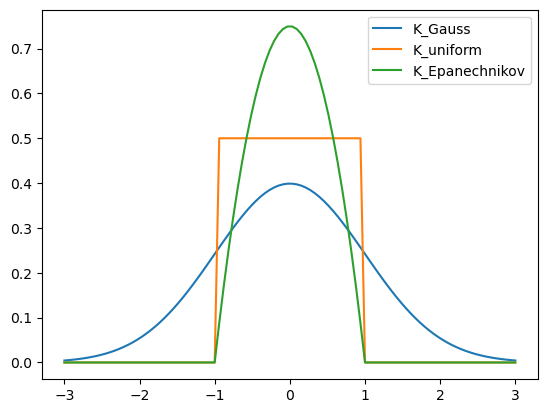

In [5]:
t = np.linspace(-3, 3, 100)
plt.plot(t, K_gauss(t), label='K_Gauss')
plt.plot(t, K_uniform(t), label='K_uniform')
plt.plot(t, K_epanechnikov(t), label='K_Epanechnikov')
plt.legend()
plt.show()

<br>

- **커널의 구체적인 선택은 보통 아주 중요하지 않음**
    
    - 가우시안 커널은 매끄럽다는 장점이 있으며, 이는 커널 밀도 추정 함수  $f_h(t)$역시 매끄러움
    - 반면 가우시안 커널은 전체 실수에 대해서 커널함수의 값이 0이 될 수 없다는 단점이 존재 ($f_h(t)$도 동일)
    
    $\rightarrow$ **유한한 구간에서만 0이 아닌 다른 커널 중 하나를 사용하여, 분포의 합을 희소하게 만드는 것이 계산적으로 더 유리할 수 있음**

<br>

#### 가우시안 커널을 사용한 커널 밀도 추정

In [8]:
d = pd.read_csv('http://www.cs.helsinki.fi/u/ahonkela/teaching/compstats1/toydata.txt').values

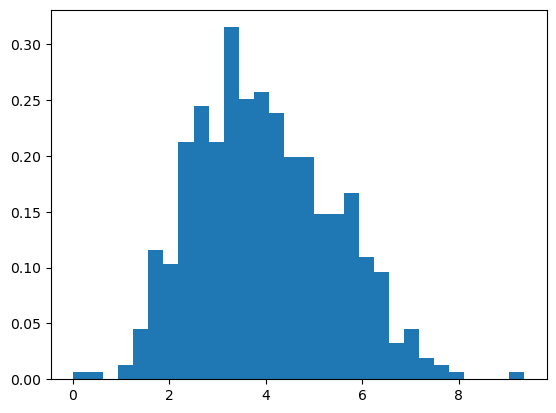

In [11]:
plt.hist(d, 30, density=True)
plt.show()

- 가우스 커널 함수

In [12]:
def K_gauss(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)

- 커널 밀도 함수 :  너비가 $h$일 때, $t$위치에서 $x$에 대한 밀도 추정량 반환

In [19]:
def kernel_density(t, x, h):
    try:
        N = len(t)
        
    except:  
        t = np.array([t])
        N = 1
        
    y = np.zeros(N)
    for i in range(N):
        y[i] = np.mean(K_gauss((t[i] - x)/ h)) / h
        
    return y

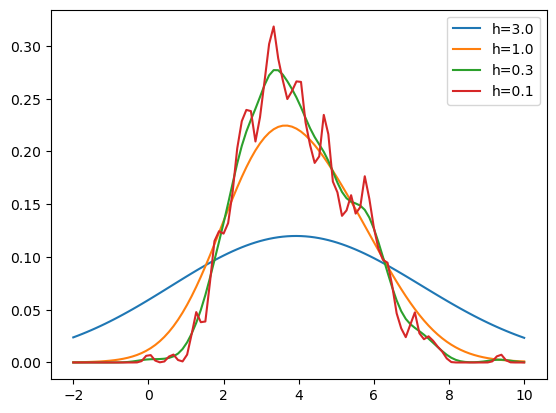

In [15]:
t = np.linspace(-2, 10, 100)
plt.plot(t, kernel_density(t, d, 3.0), label='h=3.0')
plt.plot(t, kernel_density(t, d, 1.0), label='h=1.0')
plt.plot(t, kernel_density(t, d, 0.3), label='h=0.3')
plt.plot(t, kernel_density(t, d, 0.1), label='h=0.1')
plt.legend()
plt.show()

<br>

### 01. 다변량 밀도 추정
- $d$차원의 경우, 커널 밀도 추정 $f_h(x)$은 단변량의 경우의 일반화를 적용 가능

$$f_h(\mathbf{x}) = \frac{1}{nh^d} \sum_{i=1}^n K\left(\frac{\mathbf{x} - \mathbf{x}_i}{h}\right).$$

<br>

- $d$차원에 대한 가우시안 커널
$$K_{\text{gauss}}(\mathbf{x}) = (2 \pi)^{-d/2} \exp\left(\frac{-\|\mathbf{x}\|^2}{2}\right)$$

where $\|\mathbf{x}\|_{\infty} = \max_{i = 1,\dots,d} |x_i|$

In [20]:
def k_ndgauss(x):
    d = x.shape[1]
    return np.exp(-np.sum(x**2, 1)/2) / np.sqrt(2*np.pi)**d

<br>

- $d$차원에 대한 균등 커널 

$$K_{\text{uniform}}(\mathbf{x}) = \begin{cases}\frac{1}{2^d} \quad & \text{if } \|\mathbf{x}\|_{\infty}<1, \\
0 & \text{otherwise},\end{cases}$$



In [21]:
def k_nduniform(x):
    d = x.shape[1]
    return (0.5)**d * np.all((np.abs(x) < 1), 1)

<br>

#### 2차원에 대한 가우스 / 균등 커널

In [25]:
t = np.linspace(-3, 3, 100)

[X, Y] = np.meshgrid(t, t)
Z_gauss = np.zeros(X.shape)
Z_uniform = np.zeros(X.shape)

for i in range(X.shape[1]):
    Z_gauss[:,i] = k_ndgauss(np.hstack((X[:, i:i+1], Y[:, i:i+1])))
    Z_uniform[:,i] = k_nduniform(np.hstack((X[:, i:i+1], Y[:, i:i+1])))

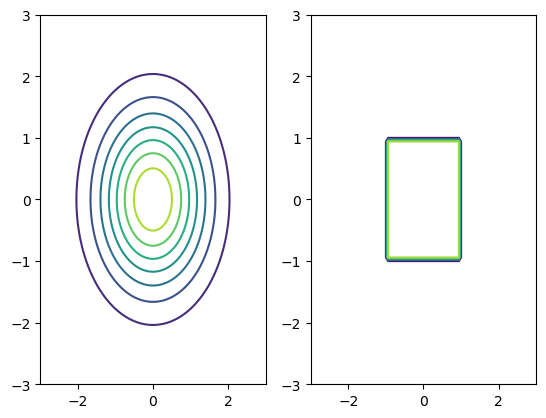

In [26]:
fig, ax = plt.subplots(1, 2)
ax[0].contour(X, Y, Z_gauss)
ax[1].contour(X, Y, Z_uniform)

plt.show()

<br>

## 04-02. 교차 검증 (Cross-validation)
- 교차 검증 (CV)은 데이터에서 알려지지 않은 매개변수를 추정하는 일반적이고 개념적으로 간단하며, 널리 적용 가능한 방법을 제공

<br>

#### 일반적인 CV의 절차
1. 데이터 세트 $X = (x_1, x_2, \dots, x_n)$를 훈련 데이터 $X_\text{train}$ $(n-m 개)$와 테스트 데이터로 $X_\text{test}$ $(m개)$ 분할
2. $X_{train}$을 통하여 모델을 적합 (밀도 추정)
3. $X_{test}$를 통하여 적합된 모델을 평가
4. $t$번 반복하여 결과의 평균을 계산

<br>

#### CV 절차의 종류
- K-fold CV : $k$개의 동일한 분리 세트 $m=n/k$, $t=k$
- LOO-CV : $m=1$, $t=n$로 ($k=n$인 K-fold CV)
- 몬테카를로 CV : 원하는 횟수만큼 적당한 크기의 하위 집합을 무작위로 샘플링

<br>

### 01. 커널 대역폭 선택에 대한 교차검증
- 커널 대역폭 $h$선택 문제에 대한 LOO-CV
- $f_{i, h}(x)$가 $X$에 적합된 확률 밀도일 때,
    
$$LOO(h) = \sum_{i=1}^n \frac{1}{n} \log f_{i, h}(x_i),$$

(테스트 데이터에 대한 로그 확률의 평균을 평가)

<br>

- LOO-CV를 통해 [0.1 ~ 1.0]범위에서 $h$에 대한 합리적인 추정치를 탐색

In [29]:
def cross_validate_density(d):
    hs = np.linspace(0.1, 1.0, 10)
    logls = np.zeros(len(hs))
    
    for j in range(len(d)):
        for i in range(len(hs)):
            logls[i] += np.sum(np.log(kernel_density(d[j], np.delete(d, j), hs[i])))
    
    return (hs, logls)

In [30]:
hs, logls = cross_validate_density(d)

In [33]:
hs, logls

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([-1034.68748596,  -917.17639413,  -895.32032722,  -888.26623056,
         -886.05544555,  -886.33251663,  -888.35764424,  -891.79069129,
         -896.40837809,  -902.04104946]))

Optimal h: 0.5


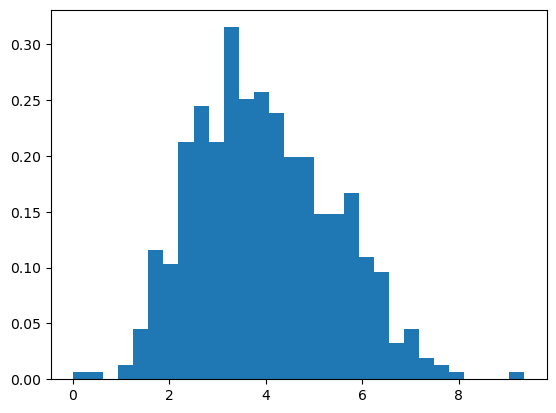

In [31]:
plt.hist(d, 30, density=True)
h_opt = hs[np.argmax(logls)]
print("Optimal h:", h_opt)

plt.show()

<br>

- CV는 머신러닝 분야에서 널리 사용

<br>

## 04-03. 커널 대역폭 선택 방법
- 커널 대역폭 $h$ 선택 문제를 분석하기 위하여, 밀도 추정치의 $f_h(x)$의 $f(x)$에 대한 성능을 평가하는 방식으로 접근

<br>

#### ISE (Integrated Squared Error, $I_2$ distance, 적분제곱오차) 

$$\mathrm{ISE}(h) = \int_{-\infty}^\infty (\hat{f}_h(x) - f(x))^2 \,\mathrm{d} x.$$


<br>

#### MISE (Mean Integrated Squared Error, 평균 적분제곱오차, IMSE)
- ISE(h)는 관측값에 따라 달라지며, 이를 방지하기 위해 평균 적분제곱오차 (MISE)를 사용

$$\mathrm{MISE}(h) = \operatorname{E}\left[ \int_{-\infty}^\infty (\hat{f}_h(x) - f(x))^2 \,\mathrm{d} x \right],$$

$$\mathrm{MISE}(h) = \int_{-\infty}^\infty \operatorname{E}[ (\hat{f}_h(x) - f(x))^2 ] \,\mathrm{d} x,$$

<br>

- $R(g) = \int_{-\infty}^\infty g^2(z) \,\mathrm{d} z$이고, 
    
    $r(k) <\infty$이며, 
    
    $f$가 충분히 부드러울 때 (평활화),
    
    $f$는  두 개의 연속 도함수 $r(f^{''}) < \infty$를 가지며, 
    
    하나는 $\mathrm{MISE}(h)$에 대한 표현식을 유도
    
$$\mathrm{MISE}(h) = \frac{R(K)}{nh} + \frac{h^4 \sigma_K^4 R(f'')}{4}
  + \mathcal{O}\left(\frac{1}{nh}+h^4\right).$$

- 만약 $h \rightarrow 0$이고, 
    
    $n \rightarrow\infty$에 따라 $nh \rightarrow \infty$이며,
    
    $\mathrm{MISE}(h) \rightarrow 0$일 때,
    
    $h$에 대해 $\mathrm{MISE}(h)$식의 첫 두 번째 항을 최소화 하면, 최적의 대역폭을 얻을 수 있음
    
$$h = \left( \frac{R(K)}{n \sigma_K^4 R(f'')} \right)^{1/5}.$$

- 위 식은 알지 못하는 함수 $R(f'')$에 의존하기에, $h$를 직접적으로 선택하기에 유용하지는 않음
    
    하지만 최적의 대역폭 $h$가 $h = \mathcal{O}(n^{-1/5})$로 감소하고, MISE가 $\mathrm{MISE} = \mathcal{O}(n^{-4/5})$로 감소함을 알 수 있음